# Time Series Analysis Exercise

In this section, we will learn how to use Python to analyze financial time series.

Time series data is an important form of structured data in many different fields, such as **finance**, **economics**, **ecology**, **neuroscience**, or **physics**. Anything that is observed or measured at many points in time forms a time series. Time series can be have a **fixed frequency**: data points occur at regular intervals according to some rule, e.g., every 2 seconds. Time series can also be **irregular** without a fixed offset between data points.

## Step 1: Load Libraries

In [3]:
%matplotlib inline

from matplotlib import pyplot as plt

import pandas as pd
import pandas_datareader.data as web
import datetime

**Note**: If the 'pandas_datareader.data as web' import fails, open your Terminal (OSX)/Command Prompt (Windows) and enter 'pip install pandas-datareader'. Once completed, execute the cell above again.

## Step 2: Load Data

We can load the data for this section using *pandas'* `read_csv(file_path, parse_dates=True, index_col=0)` command and assign the result to a new variable `df`. In that statement, replace `file_path` with the file path for the *Stock_px.csv* file on your computer, i.e., *"data/Stock_px.csv"*:

In [4]:
# Load the data into Python
df = pd.read_csv("../data/Stock_px.csv", parse_dates=True, index_col=0)

Python's pandas library provides powerful functionalities to load data from different sources, including *CSV files*, *Excel files*, and various *database systems*. Once loaded, the data is represented as a `DataFrame`. `DataFrame` is one of the most commonly used data types in pandas. You can think of a `DataFrame` as an Excel spreadsheet or an SQL table in Python.

[Help: Using Pandas To Read Data From Different Sources](http://pandas.pydata.org/pandas-docs/stable/io.html)

*pandas'* `info()` command prints a summary of the `DataFrame` which we just created. Type `df.info()` into the following cell:

In [5]:
# Display a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 1990-02-01 to 2011-10-14
Data columns (total 9 columns):
AA      5472 non-null float64
AAPL    5472 non-null float64
GE      5472 non-null float64
IBM     5472 non-null float64
JNJ     5472 non-null float64
MSFT    5472 non-null float64
PEP     5471 non-null float64
SPX     5472 non-null float64
XOM     5472 non-null float64
dtypes: float64(9)
memory usage: 427.5 KB


We can use the `head()` command to look at the first few rows of the data we loaded. Type `df.head()` into the following cell:

In [6]:
# Display he first few rows of the dataset
df.head()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-01,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12
1990-02-02,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24
1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
1990-02-06,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23
1990-02-07,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33


We can type `df.columns` to list the column names in our data set. Type `df.columns` into the following cell:

In [7]:
# Display column names
df.columns

Index([u'AA', u'AAPL', u'GE', u'IBM', u'JNJ', u'MSFT', u'PEP', u'SPX', u'XOM'], dtype='object')

In addition, it is always a good idea to test the dimensionality of the imported data using the `shape` command. This is important to make sure we have really loaded all of the data correctly. The `shape` command produces two values; the first is the number of rows, the is second the number of columns. This functionality becomes particularly powerful when working with *higher-dimensional* datasets.

Enter `df.shape` into the following cell to see if the data was loaded correctly:

In [8]:
# Check dimensionality
df.shape

(5472, 9)

## Step 3: Data Visualization

Execute the following cell to visualize the time series data we loaded in *step 2*:

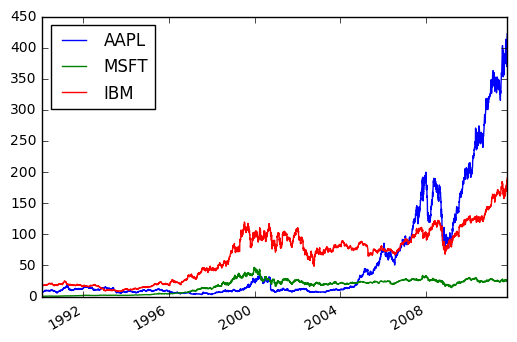

In [9]:
# Select tickers/columns to display
df = df[["AAPL", "MSFT", "IBM"]]

# Create plot
df.plot()

# Show plot on screen
plt.show()

## Step 4: Data Manipulation

In the next cell, resample the time series data to "Quarter End Frequency" and visualize the results in a plot:

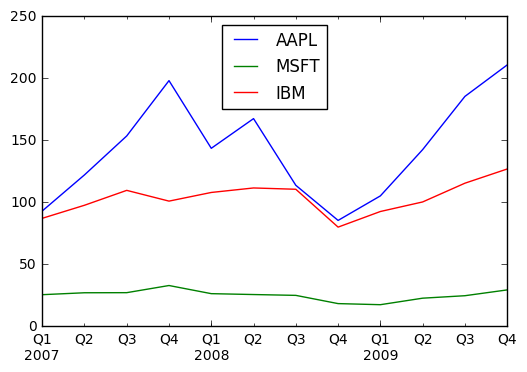

In [10]:
# Resample values in df and assign to new variable df_q
df_q = df.resample('Q').ffill()

# Visualize values stored in df_q
df_q["2007":"2009"].plot()

[Help: Frequency String Documentation](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)

**Bonus Exercise:** Experiment with other frequencies.

## Step 5: Compute Simple Statistics

We can compute different statistics directly on the `DataFrame`. Using the code from the slides, calculate the mean, standard deviation, correlation, and minimum/maximum values for the data in `df`:

In [11]:
# Calculate mean
print df.mean()

# Calculate standard deviation
print df.std()

# Calculate correlation
print df.corr()

# Extract minimum and maximum values
print df.min()
print df.max()


AAPL    57.119313
MSFT    17.046345
IBM     66.637730
dtype: float64
AAPL    88.670423
MSFT    11.000988
IBM     41.689481
dtype: float64
          AAPL      MSFT       IBM
AAPL  1.000000  0.423274  0.749037
MSFT  0.423274  1.000000  0.871615
IBM   0.749037  0.871615  1.000000
AAPL    3.23
MSFT    0.51
IBM     8.40
dtype: float64
AAPL    422.00
MSFT     46.81
IBM     190.53
dtype: float64


## Step 6: Compute Bollinger Bands

Compute and visualize the Bollinger Bands in the following cell. You can use the code from the slides as a reference.

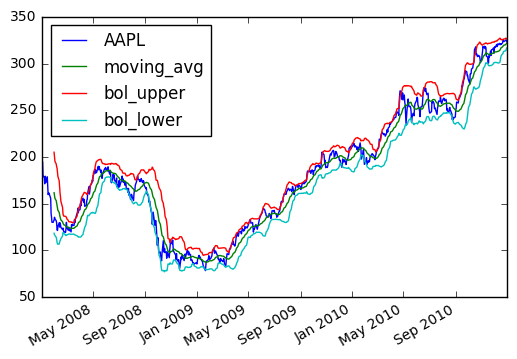

In [12]:
# Select data
ticker = "AAPL"
df = df[[ticker]] # Select columns
df = df["2008":"2010"] # Select date range

# Compute moving average, upper, and lower bands
df["moving_avg"] = df[ticker].rolling(window=20).mean()
df["bol_upper"] = df["moving_avg"] + 2 * df[ticker].rolling(min_periods=20, window=20).std()
df["bol_lower"] = df["moving_avg"] - 2 * df[ticker].rolling(min_periods=20, window=20).std()


# Visualize results
ax = df.plot()
plt.show()

**Bonus Exercise:** Compute the Bollinger Bands for other companies and experiment with different date ranges.

## Step 7: Correlation Between Stocks

In [21]:
# Load data
stock_px = pd.read_csv("../data/Stock_px.csv", parse_dates=True, index_col=0)

# Calculate and store returns
rets = stock_px.pct_change()
aapl_rets = rets.AAPL
spx_rets = rets.SPX

# Calculate correlation between variables
corr = aapl_rets.rolling(window=250).corr(spx_rets)

# Visualize results
plt.plot(corr)

IOError: File /data/Stock_px.csv does not exist

[Help: Pandas' Computational Tools](http://pandas.pydata.org/pandas-docs/version/0.18.1/computation.html)

## Step 8: Regression Analysis (Requires Internet Access)

In this last section, we want to download live stock data from *Yahoo! Finance* and perform a regression analysis on the data.

pandas can download data from different sources, including *Yahoo! Finance*, *Google Finance*, and the *World Bank*. Execute the following cell to download data from *Yahoo! Finance*:

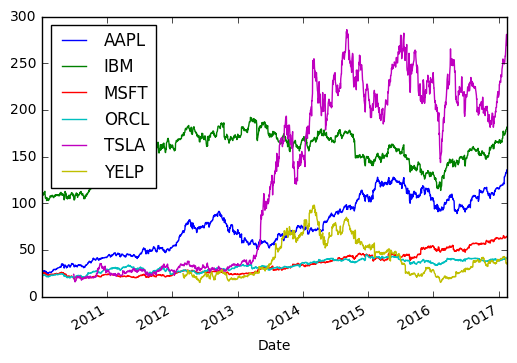

In [14]:
# Define tickers
stocks = ['ORCL', 'TSLA', 'IBM', 'YELP', 'MSFT', 'AAPL']

# Define date range
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.now()

# Fetch data from the internet
df = web.DataReader(stocks, 'yahoo', start, end)['Adj Close']

# Visualize data
df.plot()
plt.show()

Using the `df.corr()` command, we can easily compute and visualize the correlations between the stocks we downloaded in the previous step:

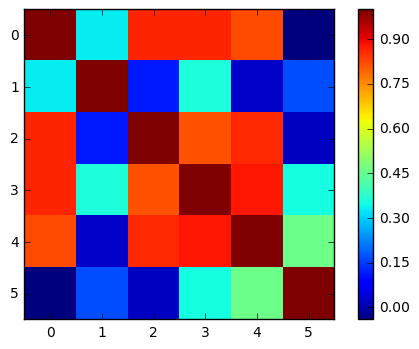

In [15]:
corrs = df.corr()
plt.imshow(corrs, interpolation='nearest')
plt.colorbar()

Using the code from the slides and the data loaded in the previous step, compute and visualize how the *beta* for the *Apple* and *Microsoft* stocks changes over time:

/Users/natashamedina/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html


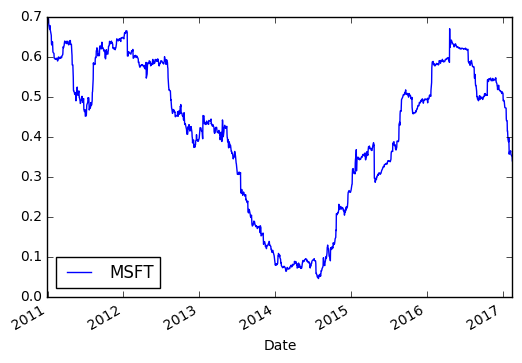

In [16]:
# Store data for Apple and Microsoft in new variables
aapl = df["AAPL"]
msft = df["MSFT"]

# Calculate returns
aapl_rets = aapl.pct_change()
msft_rets = msft.pct_change()

# Fit OLS regression model
model = pd.ols(y=aapl_rets, x={"MSFT": msft_rets}, window=250)

# Visualize results
model.beta.plot(y=["MSFT"])
plt.show()

One of the most popular uses of regression analysis is on *investment returns*, where the *market index* is independent while the *individual security* or *mutual fund* is dependent on the *market*. 

Make sure the data from *"data/Stock_px.csv"* is loaded and stored in a variable called `stock_px`:

In [17]:
# Reload data from Stock_px.csv and store in a variable called 'stock_px'
stock_px = pd.read_csv("../data/Stock_px.csv", parse_dates=True, index_col=0)

Calculate the returns on the data you loaded in the previous step and store the result in a variable called `rets`.

In [18]:
rets = stock_px.pct_change()

Store the *Apple* and *S&P 500* returns in separate variables (e.g., *aapl_rets* and *spx_rets*):

In [19]:
aapl_rets = rets.AAPL
spx_rets = rets.SPX

Calculate and visualize the beta values for the two variables that hold the *Apple* and *S&P 500* return data:

/Users/natashamedina/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  from ipykernel import kernelapp as app


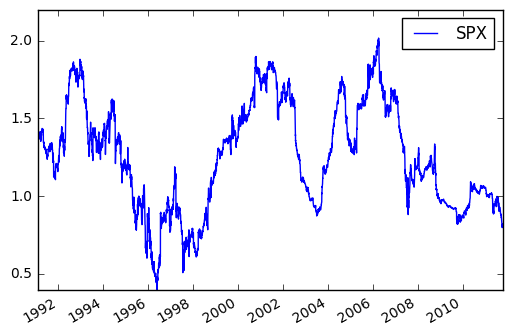

In [20]:
# Fit ordinary least-squares regression model
model = pd.ols(y=aapl_rets, x={"SPX": spx_rets}, window=250)

model.beta.plot(y=["SPX"])
plt.show()

**Bonus Exercise:** Compute and visualize the relationships between the S&P 500 returns and a group of stocks.
